### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [114]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [115]:
data.head()


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [116]:
data.shape

(1458644, 41)

Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [117]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here

data['passenger_count'].isna().sum()
data['distance_km'].isna().sum()

np.int64(145864)

In [118]:
data.isna().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [119]:
### Your code is here
popular_pass_count = data['passenger_count'].value_counts().index[0]

data['passenger_count'] = data['passenger_count'].fillna(popular_pass_count)


In [120]:
popular_pass_count

np.float64(930.3997532751514)

In [121]:
popular_distance

np.float64(0.0)

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [122]:
cat_col=['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']

In [123]:
# 1. Вычисляем средние distance_km по группам cat_col
group_means = data.groupby(cat_col)['distance_km'].mean().reset_index()

# 2. Присоединяем средние значения обратно к data
data = data.merge(group_means, on=cat_col, suffixes=('', '_mean'))

# 3. Заполняем только пропущенные значения в distance_km
data['distance_km'] = data['distance_km'].fillna(data['distance_km_mean'])

# 4. Удаляем вспомогательный столбец
data.drop(columns=['distance_km_mean'], inplace=True)


In [124]:
data.groupby(cat_col)['distance_km'].mean().reset_index()

,vendor_id,store_and_fwd_flag,traffic_jam,month_2,month_3,month_4,month_5,month_6,distance_km
0,0,0,0,0,0,0,0,0,3.323767
1,0,0,0,0,0,0,0,1,3.463570
2,0,0,0,0,0,0,1,0,3.507959
3,0,0,0,0,0,1,0,0,3.389926
4,0,0,0,0,1,0,0,0,3.405043
5,0,0,0,1,0,0,0,0,3.322016
6,0,0,1,0,0,0,0,0,3.139797
7,0,0,1,0,0,0,0,1,3.244716
8,0,0,1,0,0,0,1,0,3.258492
9,0,0,1,0,0,1,0,0,3.253105


In [125]:
data.head(20).to_csv('HW_8_7c_out.csv', sep=';', index=False)
data.head(20)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,1061.355223,0,1.100107,6.095825,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,1053.529749,0,1.327852,5.834811,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,1,930.399753,0,5.722427,7.347300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,930.399753,0,1.311541,5.545177,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,1,930.399753,0,5.126939,7.111512,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [126]:
group_means

,vendor_id,store_and_fwd_flag,traffic_jam,month_2,month_3,month_4,month_5,month_6,distance_km
0,0,0,0,0,0,0,0,0,3.323767
1,0,0,0,0,0,0,0,1,3.463570
2,0,0,0,0,0,0,1,0,3.507959
3,0,0,0,0,0,1,0,0,3.389926
4,0,0,0,0,1,0,0,0,3.405043
5,0,0,0,1,0,0,0,0,3.322016
6,0,0,1,0,0,0,0,0,3.139797
7,0,0,1,0,0,0,0,1,3.244716
8,0,0,1,0,0,0,1,0,3.258492
9,0,0,1,0,0,1,0,0,3.253105


In [127]:
group_means = data.groupby(cat_col)['distance_km'].mean().reset_index()

In [128]:
### Убедимся, что пропусков не осталось

### Your code is here
data.isna().sum().sum()

np.int64(0)

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [132]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here
X = data.drop('log_trip_duration', axis=1)
y = data['log_trip_duration']

model = LinearRegression()
model.fit(X,y)

CVscore = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=cv)
print(f"Средний MSE на кросс-валидации: {-CVscore.mean():.3f}")

Средний MSE на кросс-валидации: 0.433


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

<Axes: ylabel='log_trip_duration'>

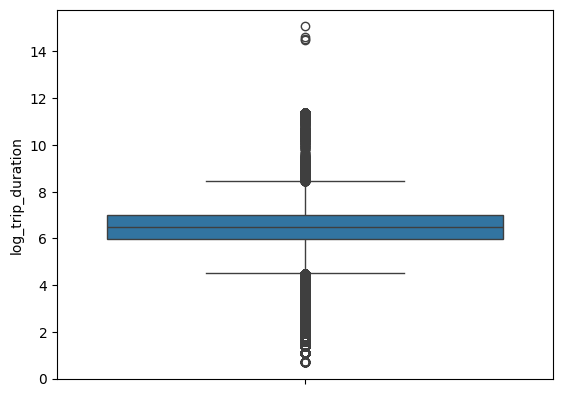

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
### Your code is here

sns.boxplot(data['log_trip_duration'])

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [10]:
### Your code is here


Снова замерьте качество на кросс-валидации, используя старый selector

In [11]:
### Your code is here
